# **Stock Data Analysis and Visualization**
## **Overview**
This Python script performs a comprehensive analysis of stock data, focusing on sector distributions, stock price retrieval, and correlation analysis. It uses data from an Excel file, Google Sheets, and an SQLite database. The script also visualizes the results using matplotlib and seaborn.

## **1.Imports**
The following libraries are imported for data processing, visualization, and interaction with external services:

In [72]:
import matplotlib.dates as mdates # For formatting dates in plots.
import matplotlib.pyplot as plt # For creating visualizations.
import seaborn as sns # For enhanced visualization capabilities.

import gspread as gs # For interacting with Google Sheets.
import pandas as pd # For data manipulation and analysis.
import numpy as np # For numerical computations.
import sqlite3 # For interacting with SQLite databases.
import time # For adding delays in API calls.

## **2. Data Preparation**

In [ ]:
## Sector Definitions
## A list of main sectors is defined for filtering and analysis.

mainSectors = (
    'AGRICULTURE, FORESTRY AND FISHING',
    'MINING AND QUARRYING',
    'MANUFACTURING',
    'ELECTRICITY GAS AND WATER',
    'CONSTRUCTION AND PUBLIC WORKS',
    'WHOLESALE AND RETAIL TRADE',
    'TRANSPORTATION AND STORAGE',
    'FINANCIAL INSTITUTIONS',
    'EDUCATION HEALTH SPORTS AND ENTERTAINMENT SERVICES',
    'TECHNOLOGY',
    'PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES',
    'ADMINISTRATIVE AND SUPPORT SERVICE ACTIVITIES',
    'REAL ESTATE ACTIVITIES',
    'HOTELS AND RESTAURANTS',
    'INFORMATION AND COMMUNICATION'
)

## Loading Sector Data
## Sector data is loaded from an Excel file and filtered to include only the main sectors.

sectors = pd.read_excel('hisse_endeks_ds.xlsx', 'Sectors')
sectors = sectors.loc[sectors.SectorName.isin(mainSectors)].drop_duplicates('Code').sort_values(by='Code')

## 3. Visualization of Sector Distributions

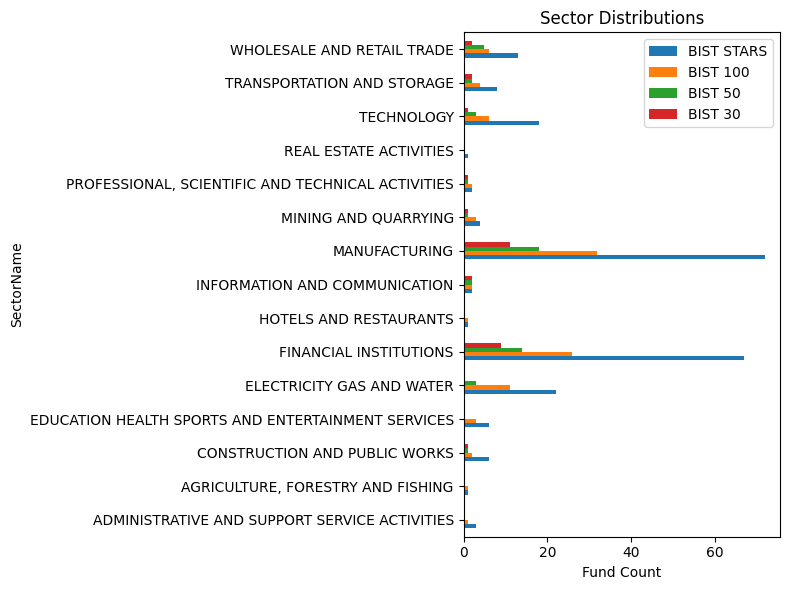

In [2]:
## Loading Index Data
## Index data is loaded from the Excel file and filtered to include only the main indices.

mainIndices = (
    'BIST STARS', 'BIST 100', 'BIST 50', 'BIST 30',
)

indices = pd.read_excel('hisse_endeks_ds.xlsx', 'Indices')
_ = indices.loc[indices.IndiceName.isin(mainIndices)]    \
        .merge(sectors, how='left', on='Code')           \
        .groupby(['IndiceName', 'SectorName'])           \
        .size()

## Plotting Sector Distributions
## The sector distributions for each index are visualized using a horizontal bar plot.

fig, ax = plt.subplots(1, sharey=True, figsize=(8, 6))
pd.concat([
    _.loc['BIST STARS'].rename('BIST STARS'),
    _.loc['BIST 100'  ].rename('BIST 100'  ),
    _.loc['BIST 50'   ].rename('BIST 50'   ),
    _.loc['BIST 30'   ].rename('BIST 30'   ),
], axis=1).fillna(0).plot(kind='barh', xlabel='Fund Count', ax=ax, title='Sector Distributions')

fig.tight_layout()
plt.show()

## 4. Google Sheets Integration

### Why not Yahoo Finance API?

_https://www.google.com/finance/quote/CCOLA:IST_

<img alt="Google Finance" src="imgs/ccola.google.finance.png" width=700>

_https://finance.yahoo.com/quote/CCOLA.IS/_

<img alt="Google Finance" src="imgs/ccola.yahoo.finance.png" width=700>

In [3]:
## Setting Up Google Sheets
## The script connects to Google Sheets using a service account and formats the worksheet.
gc  = gs.service_account(filename='dataguess-case-study-service.json')
wks = gc.open("dataguess-case-study-gspread").sheet1

wks.format('A', {'numberFormat': {'type': 'DATE_TIME', 'pattern': 'yyyy-mm-dd 00:00:00'}})
wks.format('B:E', {'numberFormat': {'type': 'CURRENCY', 'pattern': '₺ 0.00'}})

## Retrieving Stock Prices
## A function is defined to retrieve stock prices from Google Finance and format the data.
def get_stock_price_from_googlefinance(worksheet, ticker, attribute, start_date, end_date, interval):
    worksheet.update_acell(
        'A1', f'=GOOGLEFINANCE("IST:{ticker}"; "{attribute}"; "{start_date}"; "{end_date}"; "{interval}")'
    )
    
    records = pd.DataFrame(worksheet.get_all_records())
    
    records['Symbol'] = ticker
    records[['Open', 'High', 'Low', 'Close']] = records[['Open', 'High', 'Low', 'Close']].replace(['₺',','], ['','.'], regex=True).astype(float)
    
    return records

## 5. Database Operations

In [5]:
## Creating the Stocks Table
## An SQLite database is created to store stock data.

conn = sqlite3.connect('stocks.db')
cursor = conn.cursor()

## CREATE TABLE IF NOT EXISTS stocks (
##      date      DATE
##     ,symbol    TEXT
##     ,open      REAL
##     ,high      REAL
##     ,low       REAL
##     ,close     REAL
##     ,volume    INTEGER
##     ,PRIMARY KEY (date, symbol)
## );

## Populating the Database
## Stock prices for BIST STARS index are retrieved and stored in the database.

for i, ticker in enumerate(indices.loc[indices.IndiceName == 'BIST STARS'].Code.values, start=1):
    try:
        records = get_stock_price_from_googlefinance(wks, ticker, "all", "01.01.2020", "01.01.2026", "DAILY")
        records.to_sql('stocks', conn, if_exists='append', index=False)
        print(ticker)
    except Exception as e:
        print(f'passed {ticker}\n{e}')
    finally:
        conn.commit()
    time.sleep(10)

conn.close()

ADEL
ADGYO
AGHOL
AGESA
AGROT
AHGAZ
AKBNK
AKCNS
AKFGY
AKFIS
AKFYE
AKSGY
AKSA
AKSEN
AKGRT
ALGYO
ALARK
ALBRK
ALFAS
ALTNY
ANSGR
AEFES
ANHYT
ARCLK
ARDYZ
ARMGD
ASGYO
ASELS
ASTOR
ATAKP
ATATP
AVPGY
AYDEM
AYGAZ
AZTEK
BASGZ
BTCIM
BSOKE
BERA
BJKAS
BIENY
BIMAS
BINBN
BIOEN
BOBET
BORSK
BORLS
BRSAN
BRYAT
BFREN
BRISA
BUCIM
CEMZY
CCOLA
CVKMD
CWENE
CANTE
CATES
CLEBI
CIMSA
DAPGM
DSTKF
DEVA
DOHOL
ARASE
DOAS
EBEBK
ECZYT
EFORC
EGEEN
ECILC
EKGYO
ENJSA
ENERY
ENKAI
EREGL
ESCAR
TEZOL
EUREN
EUPWR
FENER
FROTO
GWIND
GSRAY
GENIL
GESAN
GLYHO
GOKNR
GOLTS
GOZDE
GRTHO
GUBRF
GLRMK
GRSEL
SAHOL
HLGYO
HRKET
HEKTS
HTTBT
ENTRA
INVEO
INVES
IEYHO
INDES
IPEKE
ISDMR
ISFIN
ISGYO
ISMEN
IZENR
JANTS
KLKIM
KLSER
KRDMA
KRDMD
KAREL
KARSN
KTLEV
KAYSE
KERVT
KLGYO
KLRHO
KMPUR
KCAER
KCHOL
KONTR
KONYA
KORDS
KOTON
KOZAL
KOZAA
KOPOL
KUYAS
LIDER
LILAK
LMKDC
LINK
LOGO
LYDHO
passed MAGEN
"None of [Index(['Open', 'High', 'Low', 'Close'], dtype='object')] are in the [columns]"
MAVI
MIATK
MGROS
MPARK
MOGAN
MOPAS
NATEN
NTHOL
NUHCM
OBAMS
ODAS
ODINE
O

## 6. Visualization of Stock Trading Ranges

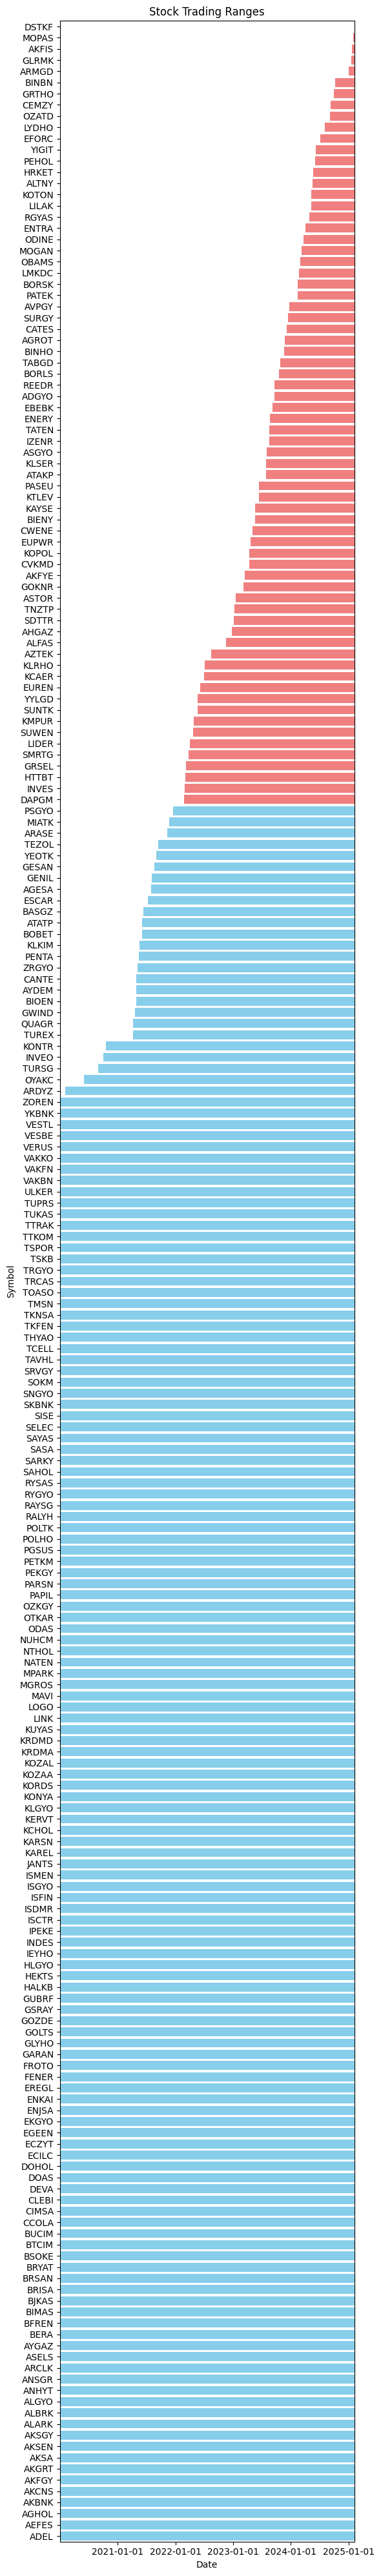

In [11]:
## Loading Trading Dates
## The script retrieves the start and end dates of trading for each stock and visualizes them.

conn = sqlite3.connect('stocks.db')
cursor = conn.cursor()

cursor.execute('''
SELECT
    symbol, MIN(date) StartDate, MAX(date), CASE WHEN MIN(date) > '2022-01-01' THEN 'lightcoral' ELSE 'skyblue' END
FROM
    stocks
GROUP BY
    symbol
ORDER BY
    StartDate;
''')

dates = pd.DataFrame(
    cursor.fetchall(),
    columns=('Code', 'StartDate', 'EndDate', 'Color'),
)

dates['StartDate'] = pd.to_datetime(dates['StartDate'])
dates['EndDate'  ] = pd.to_datetime(dates['EndDate'  ])

conn.close()

## Loading Trading Dates
## The trading ranges are visualized using a horizontal bar plot.

The script retrieves the start and end dates of trading for each stock and visualizes them.


fig, ax = plt.subplots(figsize=(6, 40))

for symbol, row in dates.iterrows():
    ax.barh(row['Code'], row['EndDate'] - row['StartDate'], left=row['StartDate'], color=row['Color'])

ax.set_ylim(-0.5, len(dates) - 0.5)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Stock Trading Ranges')
plt.xlabel('Date')
plt.ylabel('Symbol')
plt.tight_layout()

plt.tight_layout()
plt.show()

## 7. Final Sector Distributions

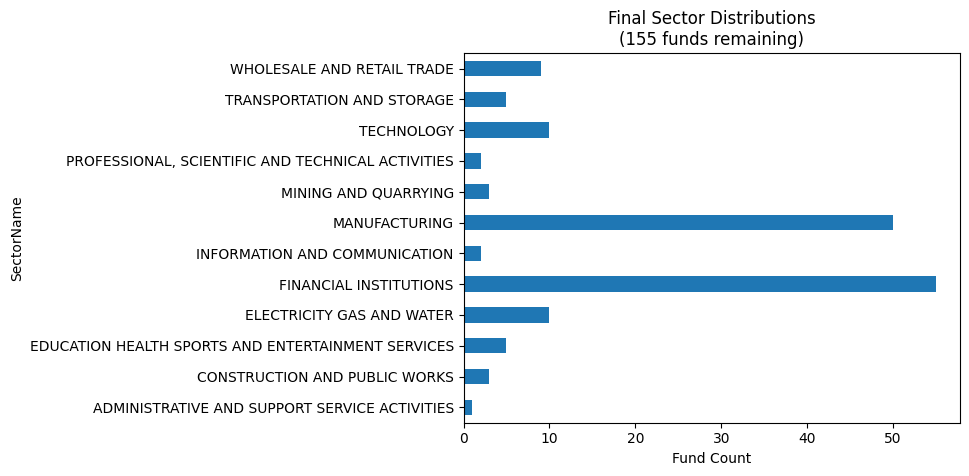

In [35]:
## Filtering Stocks
## Stocks that started trading before 2022 are selected for further analysis.

finalCodes = dates.loc[dates.StartDate < '2022-01-01','Code'].values

## Plotting Final Sector Distributions
## The sector distributions of the filtered stocks are visualized.

sectors \
    .loc[sectors.Code.isin(finalCodes), ['Code', 'SectorName']] \
    .groupby(['SectorName']) \
    .size() \
    .plot(kind='barh', xlabel='Fund Count', title=f'Final Sector Distributions\n({finalCodes.size} funds remaining)');

## 8. Correlation Analysis

In [57]:
## CREATE VIEW mature_stocks AS
## WITH final_codes AS (
##     SELECT symbol, MIN(date) AS start_date
##     FROM stocks
##     GROUP BY symbol
##     HAVING start_date < '2022-01-01'
##     ORDER BY start_date
## )
## SELECT s.date, s.symbol, s.open, s.high, s.low, s.close, s.volume
## FROM stocks s RIGHT JOIN final_codes f ON s.symbol = f.symbol
## WHERE s.date >= '2022-01-01' AND s.date <= '2025-02-07'
## ORDER BY s.symbol, s.date

## Loading Mature Stocks
## Stock data for mature stocks (trading since before 2022) is loaded from the database.

conn = sqlite3.connect('stocks.db')
cursor = conn.cursor()

cursor.execute('SELECT * FROM mature_stocks ORDER BY date, symbol')
records = pd.DataFrame(cursor.fetchall(), columns=('Date', 'Code', 'Open', 'High', 'Low', 'Close', 'Volume'))

records['Date'] = pd.to_datetime(records['Date'])
records = records.pivot(index='Date', columns='Code', values=['Open', 'High', 'Low', 'Close', 'Volume'])

conn.close()
records.head()

Open                                                             \
Code        ADEL  AEFES  AGESA  AGHOL AKBNK  AKCNS AKFGY AKGRT  AKSA  AKSEN   
Date                                                                          
2022-01-03  3.00  30.24  20.52  39.98  7.20  17.99  3.68  2.68  2.89  10.12   
2022-01-04  3.08  30.46  21.20  40.02  7.33  18.16  3.68  2.59  3.05  10.18   
2022-01-05  3.01  29.84  21.96  39.30  7.27  18.16  3.71  2.47  3.03  10.37   
2022-01-06  3.03  30.22  21.44  38.32  7.28  18.32  3.63  2.43  3.00  10.72   
2022-01-07  3.17  30.38  22.24  39.46  7.35  18.62  3.82  2.40  2.99  10.85   

            ...      Volume                                                \
Code        ...       VAKBN       VAKFN      VAKKO      VERUS       VESBE   
Date        ...                                                             
2022-01-03  ...  26400555.0  13609692.0   677974.0   428295.0   8064530.0   
2022-01-04  ...  36612802.0  32830416.0  1571226.0  1211956.0  10947813.0   
2022-01-05  ...  34858685.0  21435782.0  2180398.0   444950.0   6767823.0   
2022-01-06  ...  31375635.0   9641519.0   891001.0   278337.0   6562361.0   
2022-01-07  ...  62383673.0   8044845.0   873412.0   258176.0   7792069.0   

                                                                       
Code            VESTL      YEOTK        YKBNK       ZOREN       ZRGYO  
Date                                                                   
2022-01-03  5717875.0  1139776.0  274077473.0  38890183.0   3832023.0  
2022-01-04  8570844.0   694187.0  319225871.0  79885763.0  12596746.0  
2022-01-05  4899312.0  1637698.0  181430411.0  47561841.0   4973044.0  
2022-01-06  4804148.0   825850.0  336966331.0  22304245.0   4835317.0  
2022-01-07  3887486.0   798167.0  543181309.0  24837269.0   8291933.0  

[5 rows x 775 columns]

In [245]:
## Calculating Correlations
## Spearman correlations between stock volumes are calculated and analyzed.

correlation_matrix = records.Volume.corr('spearman')
correlation_pairs = correlation_matrix.stack()
correlation_pairs.index.names = ['Code_i', 'Code_j']
correlation_pairs.name = 'Corr'

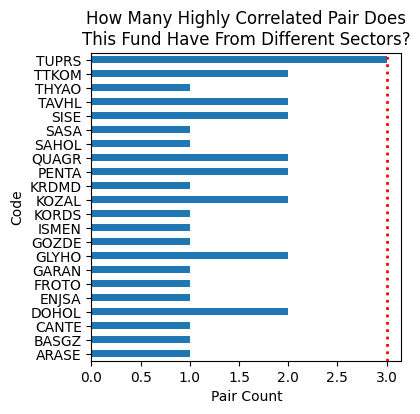

In [253]:
## Visualizing Highly Correlated Pairs
## The number of highly correlated pairs for each stock is visualized.

inter_sectorel_max_corr = correlation_pairs\
    .reset_index()\
    .merge(sectors, how='left', left_on='Code_i', right_on='Code')\
    .merge(sectors, how='left', left_on='Code_j', right_on='Code')\
    .rename(columns={'SectorName_x': 'SectorName_i', 'SectorName_y': 'SectorName_j'})\
    .query('Code_i != Code_j & SectorName_i != SectorName_j & Corr > 0.7')\
    .get(['Code_i', 'Code_j', 'Corr', 'SectorName_j'])\
    .groupby(['Code_i', 'SectorName_j']).max()

fig, ax = plt.subplots(figsize=(4, 4))
inter_sectorel_max_corr\
    .reset_index()\
    .groupby('Code_i')\
    .size()\
    .plot(
        kind='barh',
        ax=ax,
        xlabel='Pair Count',
        ylabel='Code',
        title='How Many Highly Correlated Pair Does\nThis Fund Have From Different Sectors?'
    )
ax.axvline(x=3, color='red', ls=':', lw=2)

plt.show()

In [247]:
inter_sectorel_max_corr.loc[inter_sectorel_max_corr.index.get_level_values('Code_i') == 'TUPRS']

Code_j      Corr
Code_i SectorName_j                           
TUPRS  FINANCIAL INSTITUTIONS  ISMEN  0.701049
       MINING AND QUARRYING    KOZAL  0.711320
       TECHNOLOGY              PENTA  0.760000

## Conclusion
This script provides a comprehensive analysis of stock data, including sector distributions, stock price retrieval, and correlation analysis. The results are visualized using matplotlib and seaborn, offering insights into stock trading patterns and relationships. The modular design allows for easy adaptation to other datasets or analysis tasks.